In [1]:
import torch
import torch.nn as nn
import torchsummary
import matplotlib.pyplot as plt
import numpy as np
import StyleGAN

In [2]:
generator = StyleGAN.Generator(256, 512, 8, channel_multiplier = 2)
discriminator = StyleGAN.Discriminator(256, channel_multiplier = 2)

generator_ema = StyleGAN.Generator(256, 512, 8, channel_multiplier = 2)

generator_optim = torch.optim.Adam(generator.parameters())
discriminator_optim = torch.optim.Adam(discriminator.parameters())

In [3]:
torchsummary.summary(generator, (1, 512))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         PixelNorm-1                  [-1, 512]               0
       EqualLinear-2                  [-1, 512]         262,656
       EqualLinear-3                  [-1, 512]         262,656
       EqualLinear-4                  [-1, 512]         262,656
       EqualLinear-5                  [-1, 512]         262,656
       EqualLinear-6                  [-1, 512]         262,656
       EqualLinear-7                  [-1, 512]         262,656
       EqualLinear-8                  [-1, 512]         262,656
       EqualLinear-9                  [-1, 512]         262,656
        PixelNorm-10                  [-1, 512]               0
      EqualLinear-11                  [-1, 512]         262,656
      EqualLinear-12                  [-1, 512]         262,656
      EqualLinear-13                  [-1, 512]         262,656
      EqualLinear-14                  [

In [4]:
torchsummary.summary(discriminator, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       EqualConv2d-1        [-1, 128, 256, 256]             384
    FusedLeakyReLU-2        [-1, 128, 256, 256]             128
       EqualConv2d-3        [-1, 128, 256, 256]         147,456
    FusedLeakyReLU-4        [-1, 128, 256, 256]             128
              Blur-5        [-1, 128, 257, 257]               0
       EqualConv2d-6        [-1, 256, 128, 128]         294,912
    FusedLeakyReLU-7        [-1, 256, 128, 128]             256
              Blur-8        [-1, 128, 255, 255]               0
       EqualConv2d-9        [-1, 256, 128, 128]          32,768
         ResBlock-10        [-1, 256, 128, 128]               0
      EqualConv2d-11        [-1, 256, 128, 128]         589,824
   FusedLeakyReLU-12        [-1, 256, 128, 128]             256
             Blur-13        [-1, 256, 129, 129]               0
      EqualConv2d-14          [-1, 512,

In [5]:
ckpt = torch.load('550000.pt', map_location=torch.device('cpu'))

generator.load_state_dict(ckpt['g'])
generator_ema.load_state_dict(ckpt['g_ema'])
generator_optim.load_state_dict(ckpt['g_optim'])

discriminator.load_state_dict(ckpt['d'])
discriminator_optim.load_state_dict(ckpt['d_optim'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


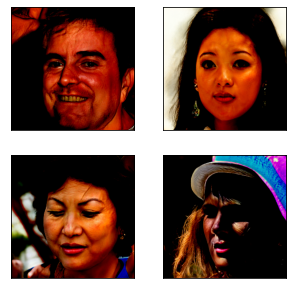

In [59]:
x = 2
fig, ax = plt.subplots(x, x, figsize=(5, 5))
image = generator(torch.randn(1, x**2, 512))[0]
for i, img in enumerate(image.detach().numpy().transpose(0,2,3,1)):
    ax[int(i/x), i%x].imshow(img)
    ax[int(i/x), i%x].get_xaxis().set_visible(False)
    ax[int(i/x), i%x].get_yaxis().set_visible(False)
plt.show()